## Penugasan Algoritma Graf Shortest Path dan Minimum Spanning Tree
#### Mata Kuliah Teori Graf – Program Studi Rekayasa Kecerdasan Artifisial (RKA) 2024
`5054241022 / Royan Harits Yustanto`

#### Initiate Utility

In [16]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import time 
import seaborn as sns
import heapq
from IPython.display import display

## *[SOAL 1]*
Buatlah sebuah matrix ketetanggan graf berbobot dengan 15 node berukuran 
15 x 15 (generate menggunakan nilai random), kemudian sajikan pembahasan 
anda secara mendalam terkait implementasi algoritma *shortest path*: 
1. Dijkstra’s Algorithm 
2. A* Algorithm (minimal menggunakan 2 pendekatan heuristik) 
3. Bellman Ford & Floyd Warshal Algorithm 
4. Johnson Algorithm 

Lakukan analisis kelebihan dan kelemahan masing – masing algorithm, dan buatkan tabel atau infografis lainnya berupa hasil evaluasi performa masing – masing algoritma 

### Inisialisasi fungsi tiap algoritma

Inisialisasi adjacency matrix berukuran 15x15 dengan bobot random.

*Seluruh matrix adjacency pada notebook ini tidak memiliki loop node (diagonal = 0)* 

In [14]:
def Matrix_Generator(size,density,weight):
    adj = np.zeros((size,size))
    
    for i in range(size):
        for j in range(size):
            if i != j and np.random.rand() < density:
                adj[i][j] = np.random.randint(weight[0], weight[1] + 1)
    return adj

#### Contoh matrix dan visualisasi graf

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,0.0,89.0,0.0,77.0,0.0,0.0,0.0,0.0,44.0,0.0,29.0,0.0,0.0,0.0,0.0
1,0.0,0.0,24.0,0.0,0.0,46.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,34.0
2,0.0,0.0,0.0,47.0,5.0,0.0,0.0,0.0,0.0,0.0,85.0,0.0,0.0,0.0,0.0
3,0.0,38.0,0.0,0.0,0.0,0.0,43.0,0.0,49.0,76.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,85.0,0.0,64.0,0.0,0.0,0.0,94.0,0.0
5,0.0,0.0,87.0,0.0,0.0,0.0,83.0,55.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,38.0,0.0,0.0,0.0,0.0,86.0,0.0,0.0,75.0,0.0,59.0,0.0,0.0,0.0,92.0
7,0.0,0.0,0.0,0.0,0.0,56.0,53.0,0.0,85.0,0.0,85.0,0.0,96.0,96.0,0.0
8,54.0,0.0,0.0,0.0,0.0,44.0,0.0,0.0,0.0,0.0,0.0,40.0,50.0,78.0,0.0
9,7.0,90.0,45.0,0.0,0.0,13.0,98.0,0.0,0.0,0.0,0.0,0.0,40.0,0.0,36.0


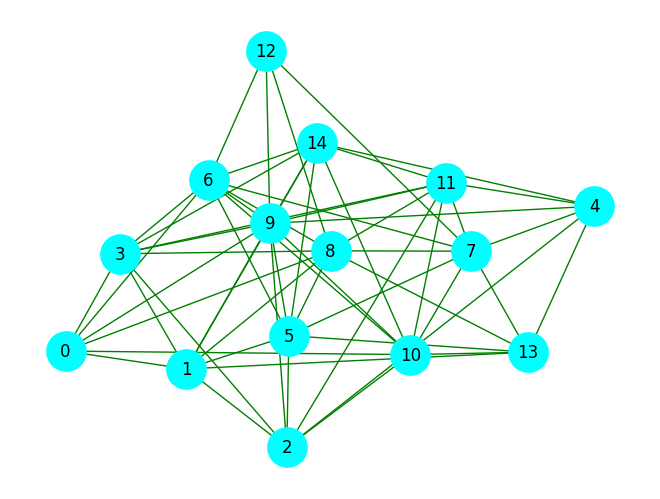

In [28]:
test_adj = Matrix_Generator(15,0.3,(1,100))

test_table = pd.DataFrame(test_adj, index=range(15), columns=range(15))
display(test_table)

test_graph = nx.from_numpy_array(test_adj, create_using=nx.Graph())
nx.draw(test_graph, nx.spring_layout(test_graph), with_labels=True, node_color='cyan', edge_color='green', node_size=800)
plt.show()

#### Dijkstra's Algorithm
Shortest path menggunakan algoritma dijkstra berdasarkan library NetworkX. 
Fungsi `Dijkstra_Algo(G,source,target)` mengembalikan path yang dilewati serta panjangnya dari source node ke target node. 

In [29]:
def Dijkstra_Algo(G,source,target):
    path = nx.dijkstra_path(G,source,target,weight="weight")
    length = nx.dijkstra_path_length(G, source, target, weight="weight")
    return path, length   

#### A* Algorithm
Shortest path menggunakan algoritma A* berdasarkan library NetworkX dengan heuristik Manhattan dan Euclidean. Pada kasus ini, algoritma A* dapat digunakan dua kali dengan heuristik yang berbeda

In [ ]:
def AStar_Algo(G,source,target,heuristicfunc):
    pos = nx.spring_layout(G)
    path = nx.astar_path(G,source,target,heuristic=lambda node,goal: heuristicfunc(node,goal,pos),weight="weight")
    length = nx.astar_path_length(G,source,target,heuristic=lambda node,goal: heuristicfunc(node,goal,pos),weight="weight")
    return path, length

def Manhattan_hc(node,goal,pos):
    x1, y1 = pos[node]
    x2, y2 = pos[goal]
    return abs(x1 - x2) + abs(y1 - y2)

import math
def Euclidean_hc(node, goal,pos):
    x1, y1 = pos[node]
    x2, y2 = pos[goal]
    return math.sqrt((x1 - x2)**2 + (y1 - y2)**2)

#### Bellman Ford & Floyd Warshall Algorithm 
Shortest path menggunakan algoritma Bellman Ford dan Floyd Warshall berdasarkan library NetworkX. 

Fungsi algoritma Floyd Warshall pada NetworkX akan mengembalikan keseluruhan jarak antar node dengan format `numpy array`, sehingga dibutuhkan sedikit perubahan pada fungsi untuk bisa mengembalikan path dan panjang dari kedua node antara source dan target  

In [ ]:
def BellmanFord_Algo(G,source,target):
    path = nx.bellman_ford_path(G,source,target,weight="weight")
    length = nx.bellman_ford_path_length(G,source,target,weight="weight")
    return path, length

def FloydWarshall_Algo(G,source,target):
    path = (source, target)
    length = nx.floyd_warshall_numpy(G,weight="weight")
    return path, float(length[source,target])

#### Johnson Algorithm
Shortest path menggunakan algoritma Johnson berdasarkan library NetworkX. 

Pada library NetworkX, algoritma Johnson mencari shortest path terhadap semua node (all pair) dan akan mengembalikan nilai `dict` yang berisi semua koneksi tiap node. Tetapi, karena pada kasus ini kita membutuhkan jarak antara dua node, maka kita hanya perlu mengakses `dict` yang sesuai dengan source dan target. Dengan hal tersebut, kita mendapat node-node yang menjadi path dari algoritma johnson. Karena algoritma johnson menggunakan kombinasi Bellman-Ford dan Dijkstra, maka untuk mendapat nilai length dari johnson, kita dapat menggunakan fungsi `shortes_path_length` yang mendukung jalur terpendek dengan Dijkstra dan Bellman-Ford.

In [ ]:
def Johnson_Algo(G,source,target):
    temp = nx.johnson(G,weight="weight")
    path = temp[source][target]
    length = nx.shortest_path_length(G,source,target,weight="weight")
    return path, length

### Analisis dan Perbandingan Algoritma *Shortest Path [SOAL 1]*
Setiap algoritma shortest path akan dibandingkan berdasarkan waktu eksekusi dan keakuratan hasil. Perbandingan setiap algoritma dilakukan dengan mencoba setiap algoritma pada jenis-jenis graph yang berbeda. Algoritma akan dijalankan beberapa kali dan di ambil rata-rata waktunya. Berikut adalah jenis-jenis graf yang digunakan :
1. Undirected dense graph (graf dengan density > 0.5)
2. Undirected Sparse graph (graf dengan density < 0.5)
3. Directed dense graph 
4. Directed Sparse graph 
5. Undirected graph dengan nilai negatif

#### Fungsi untuk menghitung waktu

Fungsi ini akan menghitung waktu eksekusi tiap algoritma untuk mencari jalur terpendek. Apabila algoritma yang dijalankan mengalami error atau graf tidak memenuhi ketentuan algoritma, maka path dan length akan menjadi `invalid` dan waktu yang diberikan sebesar `0.005` detik 

In [ ]:
def Measure_Time(Algo, G, source, target,*args):
    starttime = time.time()
    try: 
        path, length = Algo(G, source, target, *args)
    except nx.NetworkXUnbounded:
        return "invalid", "invalid", 0.005
    endtime = time.time()
    return path, length, endtime - starttime

#### Testing

Membuat dictionary utama untuk keseluruhan testing yang ditampilkan dalam format data frame pandas. `testing_result` berisi hasil overall yang mencakup waktu algoritma pada tiap jenis graf. 

In [ ]:
testing_result = {"Graph Type":[], 'Algorithm': [], 'Avg Time (s)': []}

1. Mengetest algoritma pada dense graph

In [ ]:
dense_result = {"Algorithm" : [], "Path": [], "Length": [], "Time (s)": []} #inisialisasi dict sementara untuk dense graph

for i in range(5):
    dense_adj  = Matrix_Generator(15,0.8,(1,100)) #density 0.8
    dense_Graph = nx.from_numpy_array(dense_adj, create_using=nx.Graph()) #inisialisasi dense graph
    nodes = list(dense_Graph.nodes)
    source, target = np.random.choice(nodes, size=2, replace=False)
    
    # Dijkstra
    path, length, exec_time = Measure_Time(Dijkstra_Algo, dense_Graph, source, target)
    dense_result["Algorithm"].append("Dijkstra")
    dense_result["Path"].append(path)
    dense_result["Length"].append(length)
    dense_result["Time (s)"].append(exec_time)
    
    # A* Manhattan
    path, length, exec_time = Measure_Time(AStar_Algo, dense_Graph, source, target, Manhattan_hc)
    dense_result["Algorithm"].append("A*/Manhattan")
    dense_result["Path"].append(path)
    dense_result["Length"].append(length)
    dense_result["Time (s)"].append(exec_time)
    
    # A* Euclidean
    path, length, exec_time = Measure_Time(AStar_Algo, dense_Graph, source, target, Euclidean_hc)
    dense_result["Algorithm"].append("A*/Euclidean")
    dense_result["Path"].append(path)
    dense_result["Length"].append(length)
    dense_result["Time (s)"].append(exec_time)
    
    # Bellman Ford
    path, length, exec_time = Measure_Time(BellmanFord_Algo, dense_Graph, source, target)
    dense_result["Algorithm"].append("Bellman Ford")
    dense_result["Path"].append(path)
    dense_result["Length"].append(length)
    dense_result["Time (s)"].append(exec_time)
    
    # Floyd Warshall
    path, length, exec_time = Measure_Time(FloydWarshall_Algo, dense_Graph, source, target)
    dense_result["Algorithm"].append("Floyd Warshall")
    dense_result["Path"].append(path)
    dense_result["Length"].append(length)
    dense_result["Time (s)"].append(exec_time)
    
    # Johnson
    path, length, exec_time = Measure_Time(Johnson_Algo, dense_Graph, source, target)
    dense_result["Algorithm"].append("Johnson")
    dense_result["Path"].append(path)
    dense_result["Length"].append(length)
    dense_result["Time (s)"].append(exec_time)

#convert dense result to dataframe    
df_dense = pd.DataFrame(dense_result)

#submiting dense avg to testing result
avg_dense = df_dense.groupby("Algorithm")["Time (s)"].mean().reset_index()
avg_dense["Graph Type"] = "Dense"
for _, row in avg_dense.iterrows():
    testing_result["Graph Type"].append(row["Graph Type"])
    testing_result["Algorithm"].append(row["Algorithm"])
    testing_result["Avg Time (s)"].append(row["Time (s)"])

In [ ]:
display(df_dense)

,Algorithm,Path,Length,Time (s)
0,Dijkstra,"[8, 12, 1]",18.0,0.000167
1,A*/Manhattan,"[8, 12, 1]",18.0,0.003421
2,A*/Euclidean,"[8, 12, 1]",18.0,0.003129
3,Bellman Ford,"[8, 12, 1]",18.0,0.000326
4,Floyd Warshall,"(8, 1)",18.0,0.000249
5,Johnson,"[8, 12, 1]",18.0,0.001881
6,Dijkstra,"[3, 8, 1]",15.0,0.000117
7,A*/Manhattan,"[3, 8, 1]",15.0,0.003240
8,A*/Euclidean,"[3, 8, 1]",15.0,0.002888
9,Bellman Ford,"[3, 8, 1]",15.0,0.000393


2. Mengetest algoritma pada sparse graph

In [ ]:
sparse_result = {"Algorithm" : [], "Path": [], "Length": [], "Time (s)": []}

for i in range(5):
    sparse_adj  = Matrix_Generator(15,0.3,(1,100)) #density 0.3
    sparse_Graph = nx.from_numpy_array(sparse_adj, create_using=nx.Graph())
    nodes = list(sparse_Graph.nodes)
    source, target = np.random.choice(nodes, size=2, replace=False)
    
    # Dijkstra
    path, length, exec_time = Measure_Time(Dijkstra_Algo, sparse_Graph, source, target)
    sparse_result["Algorithm"].append("Dijkstra")
    sparse_result["Path"].append(path)
    sparse_result["Length"].append(length)
    sparse_result["Time (s)"].append(exec_time)
    
    # A* Manhattan
    path, length, exec_time = Measure_Time(AStar_Algo, sparse_Graph, source, target, Manhattan_hc)
    sparse_result["Algorithm"].append("A*/Manhattan")
    sparse_result["Path"].append(path)
    sparse_result["Length"].append(length)
    sparse_result["Time (s)"].append(exec_time)
    
    # A* Euclidean
    path, length, exec_time = Measure_Time(AStar_Algo, sparse_Graph, source, target, Euclidean_hc)
    sparse_result["Algorithm"].append("A*/Euclidean")
    sparse_result["Path"].append(path)
    sparse_result["Length"].append(length)
    sparse_result["Time (s)"].append(exec_time)
    
    # Bellman Ford
    path, length, exec_time = Measure_Time(BellmanFord_Algo, sparse_Graph, source, target)
    sparse_result["Algorithm"].append("Bellman Ford")
    sparse_result["Path"].append(path)
    sparse_result["Length"].append(length)
    sparse_result["Time (s)"].append(exec_time)
    
    # Floyd Warshall
    path, length, exec_time = Measure_Time(FloydWarshall_Algo, sparse_Graph, source, target)
    sparse_result["Algorithm"].append("Floyd Warshall")
    sparse_result["Path"].append(path)
    sparse_result["Length"].append(length)
    sparse_result["Time (s)"].append(exec_time)
    
    # Johnson
    path, length, exec_time = Measure_Time(Johnson_Algo, sparse_Graph, source, target)
    sparse_result["Algorithm"].append("Johnson")
    sparse_result["Path"].append(path)
    sparse_result["Length"].append(length)
    sparse_result["Time (s)"].append(exec_time)

#convert dense result to dataframe    
df_sparse = pd.DataFrame(sparse_result)

#submiting dense avg to testing result
avg_sparse = df_sparse.groupby("Algorithm")["Time (s)"].mean().reset_index()
avg_sparse["Graph Type"] = "Sparse"
for _, row in avg_sparse.iterrows():
    testing_result["Graph Type"].append(row["Graph Type"])
    testing_result["Algorithm"].append(row["Algorithm"])
    testing_result["Avg Time (s)"].append(row["Time (s)"])

In [ ]:
display(df_sparse)

,Algorithm,Path,Length,Time (s)
0,Dijkstra,"[5, 11, 4]",35.0,0.000107
1,A*/Manhattan,"[5, 11, 4]",35.0,0.002933
2,A*/Euclidean,"[5, 11, 4]",35.0,0.002992
3,Bellman Ford,"[5, 11, 4]",35.0,0.000227
4,Floyd Warshall,"(5, 4)",35.0,0.000214
5,Johnson,"[5, 11, 4]",35.0,0.001100
6,Dijkstra,"[3, 6, 5, 4]",71.0,0.000142
7,A*/Manhattan,"[3, 6, 5, 4]",71.0,0.003066
8,A*/Euclidean,"[3, 6, 5, 4]",71.0,0.002850
9,Bellman Ford,"[3, 6, 5, 4]",71.0,0.000214


3. Mengetes algoritma pada directed dense graph

In [ ]:
Didense_result = {"Algorithm" : [], "Path": [], "Length": [], "Time (s)": []} 

for i in range(5):
    Didense_adj  = Matrix_Generator(15,0.8,(1,100)) #density 0.8
    Didense_Graph = nx.from_numpy_array(Didense_adj, create_using=nx.DiGraph())
    nodes = list(Didense_Graph.nodes)
    source, target = np.random.choice(nodes, size=2, replace=False)
    
    # Dijkstra
    path, length, exec_time = Measure_Time(Dijkstra_Algo, Didense_Graph, source, target)
    Didense_result["Algorithm"].append("Dijkstra")
    Didense_result["Path"].append(path)
    Didense_result["Length"].append(length)
    Didense_result["Time (s)"].append(exec_time)
    
    # A* Manhattan
    path, length, exec_time = Measure_Time(AStar_Algo, Didense_Graph, source, target, Manhattan_hc)
    Didense_result["Algorithm"].append("A*/Manhattan")
    Didense_result["Path"].append(path)
    Didense_result["Length"].append(length)
    Didense_result["Time (s)"].append(exec_time)
    
    # A* Euclidean
    path, length, exec_time = Measure_Time(AStar_Algo, Didense_Graph, source, target, Euclidean_hc)
    Didense_result["Algorithm"].append("A*/Euclidean")
    Didense_result["Path"].append(path)
    Didense_result["Length"].append(length)
    Didense_result["Time (s)"].append(exec_time)
    
    # Bellman Ford
    path, length, exec_time = Measure_Time(BellmanFord_Algo, Didense_Graph, source, target)
    Didense_result["Algorithm"].append("Bellman Ford")
    Didense_result["Path"].append(path)
    Didense_result["Length"].append(length)
    Didense_result["Time (s)"].append(exec_time)
    
    # Floyd Warshall
    path, length, exec_time = Measure_Time(FloydWarshall_Algo, Didense_Graph, source, target)
    Didense_result["Algorithm"].append("Floyd Warshall")
    Didense_result["Path"].append(path)
    Didense_result["Length"].append(length)
    Didense_result["Time (s)"].append(exec_time)
    
    # Johnson
    path, length, exec_time = Measure_Time(Johnson_Algo, Didense_Graph, source, target)
    Didense_result["Algorithm"].append("Johnson")
    Didense_result["Path"].append(path)
    Didense_result["Length"].append(length)
    Didense_result["Time (s)"].append(exec_time)

#convert dense result to dataframe    
df_Didense = pd.DataFrame(Didense_result)

#submiting dense avg to testing result
avg_Didense = df_Didense.groupby("Algorithm")["Time (s)"].mean().reset_index()
avg_Didense["Graph Type"] = "Directed Dense"
for _, row in avg_Didense.iterrows():
    testing_result["Graph Type"].append(row["Graph Type"])
    testing_result["Algorithm"].append(row["Algorithm"])
    testing_result["Avg Time (s)"].append(row["Time (s)"])

In [ ]:
display(df_Didense)

,Algorithm,Path,Length,Time (s)
0,Dijkstra,"[0, 13]",20.0,0.000061
1,A*/Manhattan,"[0, 13]",20.0,0.004328
2,A*/Euclidean,"[0, 13]",20.0,0.002953
3,Bellman Ford,"[0, 13]",20.0,0.000341
4,Floyd Warshall,"(0, 13)",20.0,0.000240
5,Johnson,"[0, 13]",20.0,0.002167
6,Dijkstra,"[5, 13, 6]",20.0,0.000107
7,A*/Manhattan,"[5, 13, 6]",20.0,0.002855
8,A*/Euclidean,"[5, 13, 6]",20.0,0.002710
9,Bellman Ford,"[5, 13, 6]",20.0,0.000367


4. Mengetes algoritma pada directed sparse graph

In [ ]:
Disparse_result = {"Algorithm" : [], "Path": [], "Length": [], "Time (s)": []}

for i in range(5):
    Disparse_adj  = Matrix_Generator(15,0.3,(1,100)) #density 0.3
    Disparse_Graph = nx.from_numpy_array(Disparse_adj, create_using=nx.DiGraph())
    nodes = list(Disparse_Graph.nodes)
    source, target = np.random.choice(nodes, size=2, replace=False)
    
    # Dijkstra
    path, length, exec_time = Measure_Time(Dijkstra_Algo, Disparse_Graph, source, target)
    Disparse_result["Algorithm"].append("Dijkstra")
    Disparse_result["Path"].append(path)
    Disparse_result["Length"].append(length)
    Disparse_result["Time (s)"].append(exec_time)
    
    # A* Manhattan
    path, length, exec_time = Measure_Time(AStar_Algo, Disparse_Graph, source, target, Manhattan_hc)
    Disparse_result["Algorithm"].append("A*/Manhattan")
    Disparse_result["Path"].append(path)
    Disparse_result["Length"].append(length)
    Disparse_result["Time (s)"].append(exec_time)
    
    # A* Euclidean
    path, length, exec_time = Measure_Time(AStar_Algo, Disparse_Graph, source, target, Euclidean_hc)
    Disparse_result["Algorithm"].append("A*/Euclidean")
    Disparse_result["Path"].append(path)
    Disparse_result["Length"].append(length)
    Disparse_result["Time (s)"].append(exec_time)
    
    # Bellman Ford
    path, length, exec_time = Measure_Time(BellmanFord_Algo, Disparse_Graph, source, target)
    Disparse_result["Algorithm"].append("Bellman Ford")
    Disparse_result["Path"].append(path)
    Disparse_result["Length"].append(length)
    Disparse_result["Time (s)"].append(exec_time)
    
    # Floyd Warshall
    path, length, exec_time = Measure_Time(FloydWarshall_Algo, Disparse_Graph, source, target)
    Disparse_result["Algorithm"].append("Floyd Warshall")
    Disparse_result["Path"].append(path)
    Disparse_result["Length"].append(length)
    Disparse_result["Time (s)"].append(exec_time)
    
    # Johnson
    path, length, exec_time = Measure_Time(Johnson_Algo, Disparse_Graph, source, target)
    Disparse_result["Algorithm"].append("Johnson")
    Disparse_result["Path"].append(path)
    Disparse_result["Length"].append(length)
    Disparse_result["Time (s)"].append(exec_time)

#convert dense result to dataframe    
df_Disparse = pd.DataFrame(Disparse_result)

#submiting dense avg to testing result
avg_Disparse = df_Disparse.groupby("Algorithm")["Time (s)"].mean().reset_index()
avg_Disparse["Graph Type"] = "Directed Sparse"
for _, row in avg_Disparse.iterrows():
    testing_result["Graph Type"].append(row["Graph Type"])
    testing_result["Algorithm"].append(row["Algorithm"])
    testing_result["Avg Time (s)"].append(row["Time (s)"])

In [ ]:
display(df_Disparse)

,Algorithm,Path,Length,Time (s)
0,Dijkstra,"[4, 9, 1]",15.0,0.000061
1,A*/Manhattan,"[4, 9, 1]",15.0,0.003577
2,A*/Euclidean,"[4, 9, 1]",15.0,0.003982
3,Bellman Ford,"[4, 9, 1]",15.0,0.000203
4,Floyd Warshall,"(4, 1)",15.0,0.000189
5,Johnson,"[4, 9, 1]",15.0,0.000817
6,Dijkstra,"[1, 10, 3]",25.0,0.000040
7,A*/Manhattan,"[1, 10, 3]",25.0,0.002740
8,A*/Euclidean,"[1, 10, 3]",25.0,0.002518
9,Bellman Ford,"[1, 10, 3]",25.0,0.000140


5. Mengetes algoritma pada undirected graph dengan value negatif 

In [ ]:
negative_result = {"Algorithm" : [], "Path": [], "Length": [], "Time (s)": []} 

for i in range(5):
    negative_adj  = Matrix_Generator(15,0.3,(-50,50)) 
    negative_Graph = nx.from_numpy_array(negative_adj, create_using=nx.DiGraph()) 
    nodes = list(negative_Graph.nodes)
    source, target = np.random.choice(nodes, size=2, replace=False)
    
    # Dijkstra
    negative_result["Algorithm"].append("Dijkstra")
    negative_result["Path"].append(path)
    negative_result["Length"].append(length)
    negative_result["Time (s)"].append(exec_time)
    
    # A* Manhattan
    negative_result["Algorithm"].append("A*/Manhattan")
    negative_result["Path"].append(path)
    negative_result["Length"].append(length)
    negative_result["Time (s)"].append(exec_time)
    
    # A* Euclidean
    negative_result["Algorithm"].append("A*/Euclidean")
    negative_result["Path"].append(path)
    negative_result["Length"].append(length)
    negative_result["Time (s)"].append(exec_time)
    
    # Bellman Ford
    path, length, exec_time = Measure_Time(BellmanFord_Algo, negative_Graph, source, target)
    negative_result["Algorithm"].append("Bellman Ford")
    negative_result["Path"].append(path)
    negative_result["Length"].append(length)
    negative_result["Time (s)"].append(exec_time)
    
    # Floyd Warshall
    path, length, exec_time = Measure_Time(FloydWarshall_Algo, negative_Graph, source, target)
    negative_result["Algorithm"].append("Floyd Warshall")
    negative_result["Path"].append(path)
    negative_result["Length"].append(length)
    negative_result["Time (s)"].append(exec_time)
    
    # Johnson
    path, length, exec_time = Measure_Time(Johnson_Algo, negative_Graph, source, target)
    negative_result["Algorithm"].append("Johnson")
    negative_result["Path"].append(path)
    negative_result["Length"].append(length)
    negative_result["Time (s)"].append(exec_time)

#convert dense result to dataframe    
df_negative = pd.DataFrame(negative_result)

#submiting dense avg to testing result
avg_negative = df_negative.groupby("Algorithm")["Time (s)"].mean().reset_index()
avg_negative["Graph Type"] = "negative value"
for _, row in avg_negative.iterrows():
    testing_result["Graph Type"].append(row["Graph Type"])
    testing_result["Algorithm"].append(row["Algorithm"])
    testing_result["Avg Time (s)"].append(row["Time (s)"])

In [ ]:
display(df_negative)

,Algorithm,Path,Length,Time (s)
0,Dijkstra,"[3, 4, 14]",63.0,0.000836
1,A*/Manhattan,"[3, 4, 14]",63.0,0.000836
2,A*/Euclidean,"[3, 4, 14]",63.0,0.000836
3,Bellman Ford,invalid,invalid,0.005000
4,Floyd Warshall,"(0, 11)",-9292.0,0.000224
5,Johnson,invalid,invalid,0.005000
6,Dijkstra,invalid,invalid,0.005000
7,A*/Manhattan,invalid,invalid,0.005000
8,A*/Euclidean,invalid,invalid,0.005000
9,Bellman Ford,invalid,invalid,0.005000


#### Overall Testing Result

Dengan total 30 baris pada `df_overall` (5 jenis graf x 6 algoritma) kita dapat menganalisis kelebihan dan kelemahan tiap algoritma. 

In [ ]:
df_overall = pd.DataFrame(testing_result)
display(df_overall)

,Graph Type,Algorithm,Avg Time (s)
0,Dense,A*/Euclidean,0.003191
1,Dense,A*/Manhattan,0.003356
2,Dense,Bellman Ford,0.000326
3,Dense,Dijkstra,0.000101
4,Dense,Floyd Warshall,0.000298
5,Dense,Johnson,0.001939
6,Sparse,A*/Euclidean,0.002759
7,Sparse,A*/Manhattan,0.003013
8,Sparse,Bellman Ford,0.000206
9,Sparse,Dijkstra,0.000084


Di awal, kita ingin membandingkan **waktu solving** dan hasil dari **path length** tiap algoritma. Tetapi, jika kita perhatikan pada hasil tiap testing, semua algoritma memberikan nilai length atau cost yang sama. Sehingga, pada kasus ini kita tidak perlu menganalisis hasil length dari tiap algoritma. 

Jadi, pada analisis ini kita dapat berfokus terkait waktu solving algoritma dengan mencari algoritma yang tercepat pada masing-masing jenis graf yang akan disimpan pada `each_fastest` dan mencari algoritma paling cepat secara keseluruhan yang akan disimpan pada `overall_fastest`.

In [ ]:
each_fastest = df_overall.loc[df_overall.groupby("Graph Type")["Avg Time (s)"].idxmin()]
display(each_fastest)

,Graph Type,Algorithm,Avg Time (s)
3,Dense,Dijkstra,0.000101
15,Directed Dense,Dijkstra,0.000088
21,Directed Sparse,Dijkstra,0.000052
9,Sparse,Dijkstra,0.000084
28,negative value,Floyd Warshall,0.000197


In [ ]:
overall_fastest = df_overall.loc[df_overall["Avg Time (s)"].idxmin()]
display(overall_fastest)

Graph Type      Directed Sparse
Algorithm              Dijkstra
Avg Time (s)           0.000052
Name: 21, dtype: object

#### Berikut merupakan grafik perbandingan waktu solving tiap algoritma per jenis grafnya

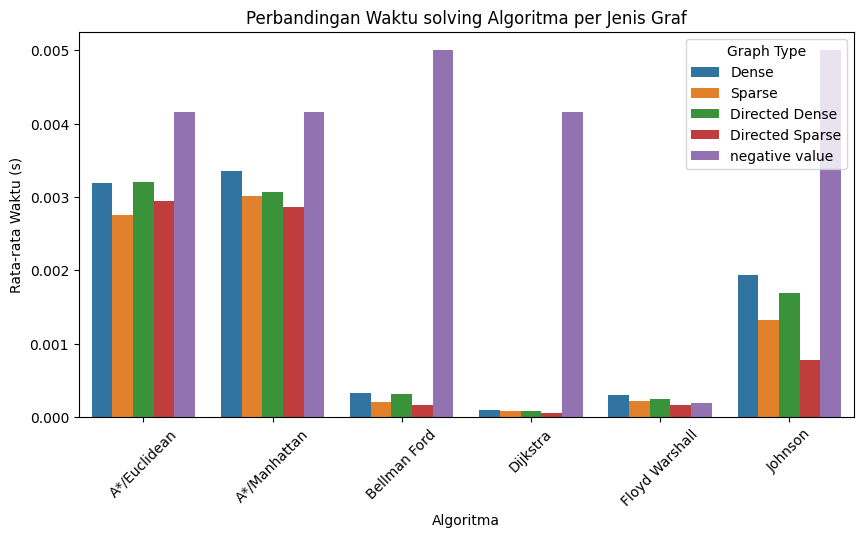

In [ ]:
plt.figure(figsize=(10, 5))
sns.barplot(x='Algorithm', y='Avg Time (s)', hue='Graph Type', data=df_overall)
plt.xticks(rotation=45)
plt.title("Perbandingan Waktu solving Algoritma per Jenis Graf")
plt.ylabel("Rata-rata Waktu (s)")
plt.xlabel("Algoritma")
plt.legend(title="Graph Type")
plt.show()

Berdasarkan grafik `perbandingan waktu solving algoritma per jenis graf`, kita dapat menganalisis efisiensi masing-masing algoritma berdasarkan jenis graf yang diuji.

**A (Euclidean & Manhattan)** <br> A* Euclidean dan Manhattan memiliki waktu eksekusi yang relatif lebih tinggi dibandingkan algoritma lain pada semua jenis graf. A* adalah algoritma yang sangat bergantung pada fungsi heuristiknya. Pada kasus ini, heuristik Manhattan dan Euclidean tidak optimal. Performa pada graf dengan negatif value sangat tidak efisien dikarenakan algoritma A* tidak bisa menangani edges dengan value negatif.

**Bellman-Ford** <br>
Performa Bellman-Ford pada graf negatif bergantung pada ada tidaknya negative cycle. jika negative cycle ada, algoritma Bellman Ford tidak bisa digunakan. Tetapi, untuk graf bernilai positif Bellman Ford dapat memberikan waktu yang lebih kecil jika dibandingkan dengan A*

**Dijkstra** <br>
Dijkstra menunjukkan waktu eksekusi paling cepat secara rata-rata pada grafik yang berbobot positif pada kasus ini. Tetapi, tidak pada graf dengan bobot negatif. 

**Floyd-Warshall** <br>
Floyd-Warshall memiliki waktu eksekusi yang lebih tinggi dibandingkan Dijkstra, tetapi memiliki waktu tercepat pada graf negatif. Karena kompleksitasnya O(V³), algoritma ini cocok untuk mencari jalur terpendek antara semua pasangan node tetapi tidak optimal untuk graf dense. 

**Johnson** <br>
Johnson bergantung pada penerapan algoritma Bellman-Ford dan Dijkstra, sehingga memiliki performa yang lebih baik pada graf kecil seperti Dijkstra, tetapi dapat menangani bobot negatif berdasarkan Bellman Ford. 

Dengan adanya grafik dan pembahasan di atas, kita dapat mengetahui kelebihan dan kelemahan tiap algoritma

| **Algoritma**          | **Cara Kerja**                          | **kelebihan**                                  | **Kekurangan**                     | **Time Complexity**                  |
|--------------------|--------------------------------------------------|--------------------------------------------------|-----------------------------------------------|-----------------------------------------------|
| **Dijkstra**    | Menggunakan BFS dengan heapqueue untuk menemukan jalur terpendek dari node awal ke tujuan. | Efisien pada node dengan nilai positif dan sparse graph. | tidak bisa pada graf dengan bobot negatif. | O(V log V + E) |
| **A Star**     | Mencari jalur terpendek berdasarkan fungsi heuristik. | Lebih cepat dari Dijkstra jika heuristik optimal dan Cocok untuk pathfinding secara real-time | Sangat bergantung pada fungsi heuristik | O(E log V) tergantung pada fungsi heuristik|
| **Bellman Ford**   | Memeriksa semua edge berulang kali untuk memperbarui jarak, termasuk bobot negatif. | Bisa menangani bobot negatif |Lambat dibanding Dijkstra untuk graf tanpa bobot negatif dan tidak bisa bekerja jika ada siklus negatif| O(VE) |
| **floyd Warshall** | Mencari jalur terpendek antara semua node menggunakan dynamic programming | Menemukan semua pasangan jalur terpendek dalam satu eksekusi dan dapat menangani bobot negatif (tanpa siklus negatif)| Kompleksitas tinggi untuk dense graph| O(V³) |
| **Johnson** | Menggunakan kombinasi Dijkstra dan Bellman Ford untuk mencari jalur terpendek dan negative value handling | Menangani Bobot Negatif dan efektif pada sparse graf | Kompleksitas Relatif Tinggi untuk Graf Dense dan bergantung pada Bellman Ford| O(VE+VElogV) |

<div class="alert alert-block alert-success">
Berdasarkan testing yang telah dilakukan, <b>dapat disimpulkan bahwa pada kasus ini algoritma dengan waktu solving tercepat pada setiap graf dengan nilai positif adalah algoritma Dijkstra. sedangkan pada graf dengan value negatif, algoritma tercepat adalah algoritma Floyd Warshall </b>. 
</div>

## *[SOAL 2]*
Buatlah sebuah daftar ketetanggan graf berbobot dengan 10 node berukuran,(generate menggunakan nilai random), kemudian sajikan pembahasan anda secara mendalam terkait implementasi algoritma *minimum spanning tree* menggunakan:
1. Kruskal’s Algorithm 
2. Prim’s Algorithm 

Lakukan analisis kelebihan dan kelemahan masing – masing algorithm, dan buatkan tabel atau infografis lainnya berupa hasil evaluasi performa masing – masing algoritma  

### Inisialisasi fungsi yang dibutuhkan
Dengan menggunakan function yang telah ada, kita bisa langsung membuat matrix yang dibutuhkan


,0,1,2,3,4,5,6,7,8,9
0,0.0,0.0,0.0,10.0,0.0,0.0,2.0,18.0,37.0,39.0
1,0.0,0.0,50.0,26.0,10.0,19.0,38.0,0.0,0.0,0.0
2,37.0,4.0,0.0,32.0,0.0,18.0,0.0,0.0,18.0,0.0
3,0.0,0.0,49.0,0.0,41.0,0.0,0.0,28.0,0.0,0.0
4,0.0,46.0,1.0,0.0,0.0,16.0,17.0,0.0,0.0,12.0
5,0.0,0.0,28.0,7.0,0.0,0.0,26.0,45.0,0.0,0.0
6,0.0,0.0,0.0,0.0,20.0,0.0,0.0,0.0,0.0,0.0
7,9.0,4.0,18.0,4.0,36.0,16.0,21.0,0.0,5.0,0.0
8,0.0,0.0,5.0,43.0,0.0,7.0,0.0,0.0,0.0,0.0
9,0.0,0.0,25.0,0.0,0.0,0.0,0.0,39.0,0.0,0.0


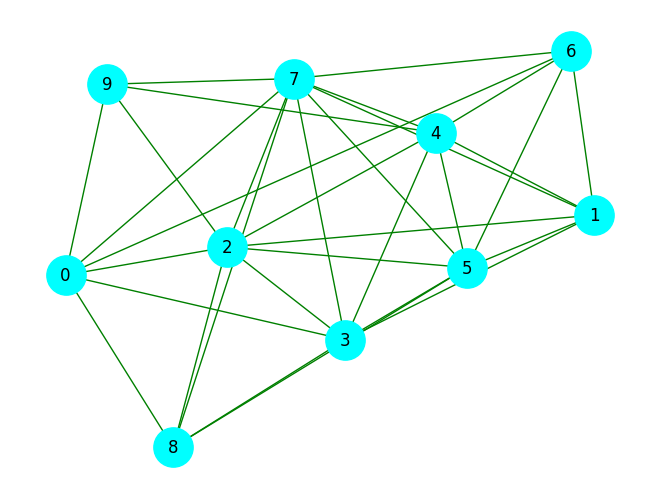

In [43]:
#contoh matrix dan graf
adj_mst = Matrix_Generator(10,0.4,(1,50))

mst_Table = pd.DataFrame(adj_mst, index=range(10), columns=range(10))
display(mst_Table)

mst_graph = nx.from_numpy_array(adj_mst, create_using=nx.Graph())
nx.draw(mst_graph, nx.spring_layout(mst_graph), with_labels=True, node_color='cyan', edge_color='green', node_size=800)
plt.show()

#### Kruskal’s Algorithm

Fungsi untuk mencari minimum spanning tree dengan library networkx. Algoritma Kruskal bekerja dengan mengurutkan weight edges dari keseluruhan graf. Proses pembuatan MST dilakukan dengan cara memilih edges dengan weight terendah hingga tertinggi dengan syarat kumpulan dari edges-edges tidak membuat cycle

In [44]:
def Kruskal_mst(G):
    mst = nx.minimum_spanning_tree(G, algorithm='kruskal', weight='weight')
    total_weight = sum(data["weight"] for _, _, data in mst.edges(data=True))
    return mst, total_weight

#### Prim’s Algorithm 
Pada algoritma prim kita dapat memilih node yang akan menjadi awal dari MST. kemudian, prim mengecek tiap edges yang terkoneksi dengan node yang telah ditambahkan ke MST dan akan memilih edges dengan weight terkecil. Jika edges dengan weight terkecil ditemukan, node yang terhubung akan ditambahkan ke MST dengan syarat node tersebut belum pernah dikkunjungi sebelumnya

In [45]:
def Prim_mst(G,source):
    mst = nx.Graph()
    visited = set()
    edges = []
    total_weight = 0 
    
    visited.add(source)
    
    for neighbor, data in G[source].items():
        heapq.heappush(edges, (data["weight"], source, neighbor))

    while edges:
        weight, u, v = heapq.heappop(edges)        
        if v not in visited:
            visited.add(v)
            mst.add_edge(u, v, weight=weight)
            total_weight += weight
            
            for neighbor, data in G[v].items():
                if neighbor not in visited:
                    heapq.heappush(edges, (data["weight"], v, neighbor))
    return mst, total_weight

### Analisis Algoritma Kruskal dan Prim untuk Membuat Minimum Spanning Tree  
Kedua algoritma akan dites untuk membuat Minimum Spanning Tree pada 2 jenis graf, Sparse graph dan Dense graph. Kedua algoritma akan dibandingkan dari waktu eksekusi dan juga total weight dari MST. Pada algoritma Prim, karena kita dapat memilih node awal dari MST, maka Algoritma Prim akan dicoba sesuai dengan jumlah node yang ada pada graf tersebut. 

#### Testing

Fungsi `Time_mst`untuk menghitung waktu solving mst dan `mst_result` untuk menyimpan hasil dari algoritma kruskal. Selain itu, dibuat juga dict `prim_result` untuk menyimpan data dari hasil algoritma prim. 


In [46]:
def Time_mst(Algo, G, *args):
    starttime = time.time()
    mst, total_weight = Algo(G, *args)
    endtime = time.time()
    return mst, total_weight, endtime - starttime

In [47]:
mst_result = {"Graph Type":[], "Algorithm": [], "mst":[], "Total Weight": [], "Time (s)": []}
prim_result = {"Graph Type" : [], "mst": [], "Total Weight": [], "Time (s)": []} 

1. Undirected sparse graph

In [48]:
for i in range(3):
    adj_mst_sparse = Matrix_Generator(10,0.3,(1,50))
    mst_sparse = nx.from_numpy_array(adj_mst_sparse, create_using=nx.Graph())

    edges, total, exec_time = Time_mst(Kruskal_mst,mst_sparse)
    mst_result["Graph Type"].append("Sparse")
    mst_result["Algorithm"].append("Kruskal")
    mst_result['Total Weight'].append(total)
    mst_result["mst"].append(edges)
    mst_result["Time (s)"].append(exec_time)
    
    for j in range(0,10):
        edges, total, exec_time = Time_mst(Prim_mst,mst_sparse,j)
        prim_result["Graph Type"].append("Sparse")
        prim_result["Total Weight"].append(total)
        prim_result["mst"].append(edges)
        prim_result["Time (s)"].append(exec_time)

2. Undirected dense graph

In [49]:
for i in range(3):
    adj_mst_dense = Matrix_Generator(10,0.7,(1,50))
    mst_dense = nx.from_numpy_array(adj_mst_dense, create_using=nx.Graph())

    edges, total, exec_time = Time_mst(Kruskal_mst,mst_dense)
    mst_result["Graph Type"].append("Dense")
    mst_result["Algorithm"].append("Kruskal")
    mst_result["Total Weight"].append(total)
    mst_result["mst"].append(edges)
    mst_result["Time (s)"].append(exec_time)
    
    for j in range(0,10):
        edges, total, exec_time = Time_mst(Prim_mst,mst_dense,j)
        prim_result["Graph Type"].append("Dense")
        prim_result["Total Weight"].append(total)
        prim_result["mst"].append(edges)
        prim_result["Time (s)"].append(exec_time)

Hasil dari pengulangan Prim pada kedua jenis graph 

In [50]:
df_prim_result = pd.DataFrame(prim_result)
display(df_prim_result)

,Graph Type,mst,Total Weight,Time (s)
0,Sparse,"(0, 5, 1, 4, 9, 3, 6, 8, 2, 7)",120.0,0.000113
1,Sparse,"(1, 5, 0, 4, 9, 3, 6, 8, 2, 7)",120.0,0.000077
2,Sparse,"(2, 8, 4, 9, 3, 6, 5, 1, 0, 7)",120.0,0.000050
3,Sparse,"(3, 9, 4, 6, 8, 2, 5, 1, 0, 7)",120.0,0.000054
4,Sparse,"(4, 9, 3, 6, 8, 2, 5, 1, 0, 7)",120.0,0.000053
5,Sparse,"(5, 1, 0, 4, 9, 3, 6, 8, 2, 7)",120.0,0.001062
6,Sparse,"(6, 4, 9, 3, 8, 2, 5, 1, 0, 7)",120.0,0.000116
7,Sparse,"(7, 3, 9, 4, 6, 8, 2, 5, 1, 0)",120.0,0.000059
8,Sparse,"(8, 2, 4, 9, 3, 6, 5, 1, 0, 7)",120.0,0.000056
9,Sparse,"(9, 3, 4, 6, 8, 2, 5, 1, 0, 7)",120.0,0.000074


 Data pada `df_prim_result` memiliki 40 baris karena program menjalankan pengujian sebanyak 2 kali untuk setiap jenis graf `i`. Dalam setiap iterasi `i`, algoritma Prim dijalankan sebanyak 10 kali, sesuai dengan jumlah node dalam graf `j`.

Meskipun algoritma Prim memulai dari node yang berbeda di setiap iterasi, nilai total weight dari MST tetap sama untuk graf yang sama. Namun, waktu eksekusi bervariasi, menunjukkan bahwa pemilihan node awal dapat memengaruhi performa algoritma.
Dengan itu, kita dapat memilih hasil MST yang tercepat dan paling lambat dari setiap graf. 

In [51]:
fastest_prim = df_prim_result.loc[df_prim_result.groupby("Total Weight")["Time (s)"].idxmin()]
display(fastest_prim)

slowest_prim = df_prim_result.loc[df_prim_result.groupby("Total Weight")["Time (s)"].idxmax()]
display(slowest_prim)

,Graph Type,mst,Total Weight,Time (s)
55,Dense,"(5, 0, 7, 1, 3, 8, 2, 6, 9, 4)",40.0,0.000050
39,Dense,"(9, 5, 2, 0, 4, 8, 6, 3, 1, 7)",62.0,0.000057
41,Dense,"(1, 8, 6, 4, 2, 3, 5, 9, 7, 0)",72.0,0.000058
27,Sparse,"(7, 6, 4, 0, 3, 1, 8, 5, 2, 9)",89.0,0.000048
2,Sparse,"(2, 8, 4, 9, 3, 6, 5, 1, 0, 7)",120.0,0.000050
17,Sparse,"(7, 1, 4, 2, 3, 0, 9, 6, 5, 8)",165.0,0.000048


,Graph Type,mst,Total Weight,Time (s)
50,Dense,"(0, 7, 1, 5, 3, 8, 2, 6, 9, 4)",40.0,0.000071
34,Dense,"(4, 0, 5, 2, 9, 8, 6, 3, 1, 7)",62.0,0.000389
43,Dense,"(3, 5, 4, 6, 2, 9, 8, 1, 7, 0)",72.0,0.000164
20,Sparse,"(0, 3, 1, 8, 5, 4, 6, 7, 2, 9)",89.0,0.000075
5,Sparse,"(5, 1, 0, 4, 9, 3, 6, 8, 2, 7)",120.0,0.001062
14,Sparse,"(4, 1, 2, 3, 0, 9, 6, 7, 5, 8)",165.0,0.000094


Pada graf sparse, dapat kita perhatikan bahwa algoritma prim terkadang memiliki waktu eksekusi yang sangat lama (salah satu baris di `slowest_prim`) jika dibandingkan dengan performanya di graf dense. Terdapat lonjakan waktu eksekusi dikarenakan prim harus mengecek banyak edge dan membandingkan tiap weightnya.

Bandingkan prim dengan hasil dari algoritma Kruskal

In [52]:
df_kruskal = pd.DataFrame(mst_result)
display(df_kruskal)

,Graph Type,Algorithm,mst,Total Weight,Time (s)
0,Sparse,Kruskal,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9)",120.0,0.000417
1,Sparse,Kruskal,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9)",165.0,0.000190
2,Sparse,Kruskal,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9)",89.0,0.000174
3,Dense,Kruskal,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9)",62.0,0.000283
4,Dense,Kruskal,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9)",72.0,0.000243
5,Dense,Kruskal,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9)",40.0,0.000183


#### Grafik perbandingan Kecepatan antara dua algoritma:

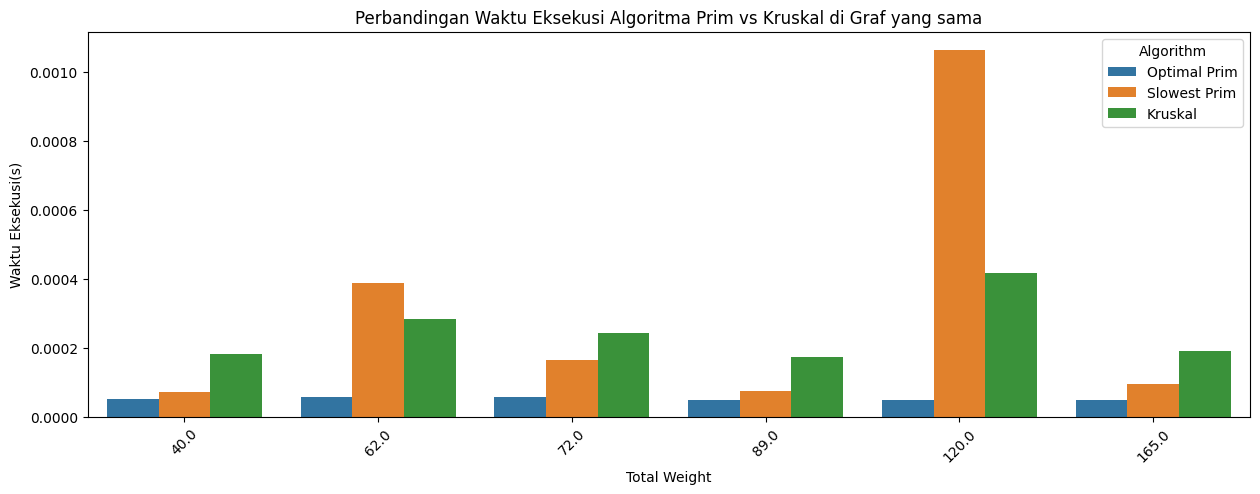

In [53]:
df_combined = pd.concat([fastest_prim.assign(Algorithm="Optimal Prim"),slowest_prim.assign(Algorithm="Slowest Prim"),df_kruskal.assign(Algorithm="Kruskal")
])

plt.figure(figsize=(15, 5))
sns.barplot(x="Total Weight", y="Time (s)", hue="Algorithm", data=df_combined)
plt.xticks(rotation=45)
plt.title("Perbandingan Waktu Eksekusi Algoritma Prim vs Kruskal di Graf yang sama")
plt.ylabel("Waktu Eksekusi(s)")
plt.xlabel("Total Weight")
plt.legend(title="Algorithm")
plt.show()

Dengan adanya grafik di atas, kita dapat mengetahui kelebihan dan kelemahan tiap algoritma MST

| **Algoritma**          | **Cara Kerja**                          | **kelebihan**                                  | **Kekurangan**                     | **Time Complexity**                  |
|--------------------|--------------------------------------------------|--------------------------------------------------|-----------------------------------------------|-----------------------------------------------|
| **Prim**    | Memulai dari satu node dan menambahkan node lainnya berdasarkan edge terkecil yang telah terhubung ke node-node yang ditambahkan | - Efisien untuk graf dense karena menggunakan heapq dan jika menemukan source node yang tepat <br> -Dapat menghasilkan banyak kombinasi MST dari satu graf | Kurang efisien untuk graf sparse karena perlu memeriksa setiap edge yang tersedia dan sangat bergantung pada node pertama yang dipilih (source node)| O(V²) (Adjacency Matrix), O(E log V) (Min Heap + Adjacency List) |
| **Kruskal**     | Mengurutkan semua edge berdasarkan bobot, lalu menambahkannya ke MST selama tidak membentuk siklus  | Efisien untuk graf sparse karena hanya memproses edge yang dibutuhkan. | Performa bisa lebih lambat dibanding Prim pada graf dense karena perlu sorting edge. | O(E log E) (Sorting + Union-Find)|

<div class="alert alert-block alert-success">
Berdasarkan testing yang telah dilakukan, <b>dapat disimpulkan bahwa algoritma Kruskal adalah algoritma minimum spanning tree yang efisien untuk graf sparse karena penggunaan sorting dan union find. Sedangkan algoritma prim adalah algoritma  yang lebih efisien untuk graf dense karena penggunaan heapq. Tetapi, prim sangat dipengaruhi oleh source node, karena dapat lebih optimal daripada kruskal jika menemukan source node yang sesuai.  </b>
</div>